### Universidad Autonoma de Aguascalientes
### Centro de Ciencias Basicas
### Departamento de Ciencias de la Computacion
### Carrera: Ingenieria en Computacion Inteligente
### Materia: Machine Learning
### Profesor: Dr. Francisco Javier Luna Rosas
### Alumno: Diego Emilio Moreno Sanchez

### Practica 2 Algoritmo del perceptron simple aplicado a la flor de Iris (datos linealmente separables)

Cargar dos clases de la flor de Iris (setosa y versicolor). Las caracteristicas que tomaremos en cuenta son: Longitud de petalo y longitud de sefalo.

In [1]:
import os
import numpy as np
import pandas as pd

/tmp/ipykernel_181911/2916776140.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Cargamos el dataset

In [2]:
dataset = pd.read_csv("iris.csv",delimiter=";",decimal=".")
print(dataset.shape)
print(dataset.head())

(150, 5)
   s.largo  s.ancho  p.largo  p.ancho    tipo
0      5.1      3.5      1.4      0.2  setosa
1      4.9      3.0      1.4      0.2  setosa
2      4.7      3.2      1.3      0.2  setosa
3      4.6      3.1      1.5      0.2  setosa
4      5.0      3.6      1.4      0.2  setosa


#### Extraemos los datos que queremos

In [3]:
x = dataset.iloc[0:100, [0, 2]].values
# print(x)

In [4]:
y = dataset.iloc[0:100, 4].values
# print(x)

#### Convertimos etiquetas a numeros

In [5]:
y = np.where(y == "setosa", -1, 1)
print(y)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


#### Creamos el objeto del tipo perceptron

In [6]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron()

#### Entrenamos el perceptron

In [7]:
perceptron.fit(x, y)

Perceptron()

In [8]:
perceptron.predict([[5.7,4.1],[5.1,1.4]])

array([ 1, -1])

### De manera manual

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = open("iris.csv")
datos = []
clases_ = []

for i, row in enumerate(data):
    # tomamos s.largo, y p.largo, que son los datos 0 y 2, las clases son los datos 4
    if i != 0:
        datos_flor = row.split(";")
        datos_flor_cool = [float(datos_flor[0]), float(datos_flor[2])]
        clase_flor_cool = datos_flor[4]
        clase_flor = 0
        if clase_flor_cool == 'versicolor\n':
            clase_flor = 1
        clases_.append(float(clase_flor))
        datos.append(datos_flor_cool)

flores = np.array(datos)
clases = np.array(clases_)

def activacion(pesos, x, b):
    z = np.dot(pesos, x)
    if z + b > 0:
        return 1
    else:
        return 0

pesos = np.random.uniform(1, 5, 2)
b = np.random.uniform(-1, 1)

print("Pesos iniciales:", pesos)
print("Sesgo inicial:", b)
print("Salida:", activacion(pesos, [5.0,1.2],b))

Pesos iniciales: [4.68728713 3.63880144]
Sesgo inicial: 0.9164034844078766
Salida: 1


#### Entrenamiento

In [11]:
pesos = np.random.uniform(1, 5, 2)
b = np.random.uniform(-1, 1)
tasa_aprendizaje = 0.01
epocas = 100

In [12]:
for epoca in range(epocas):
    errores = 0
    for i in range(len(flores)):
        prediccion = activacion(pesos, flores[i], b)
        error = clases[i] - prediccion
        errores += error**2
        pesos[0] += tasa_aprendizaje * error * flores[i][0]
        pesos[1] += tasa_aprendizaje * error * flores[i][1]
        b += tasa_aprendizaje * error

In [13]:
print("Pesos finales:", pesos)
print("Sesgo final:", b)
print("Salida:", activacion(pesos, [5, 1.4], b))

Pesos finales: [ 0.14640864 -0.20696125]
Sesgo final: -0.8262219387176877
Salida: 0


In [ ]:
#### Graficando

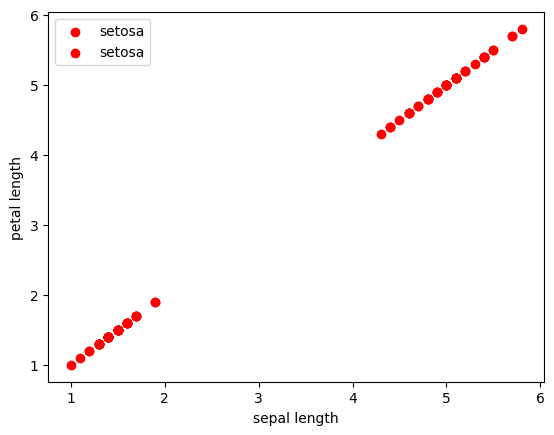

In [18]:
x = []
y = []
for i in range(len(flores)):
    x.append(flores[i][0])
    y.append(flores[i][1])

plt.scatter(x[:50], x[:50],
            color="red", marker="o", label="setosa")

plt.scatter(y[:50], y[:50],
            color="red", marker="o", label="setosa")

plt.xlabel('sepal length')
plt.ylabel('petal length')

plt.legend(loc='upper left')

#### Conclusiones

En esta pracitca utilizamos un algoritmo de ML para clasificar clases que son linealmente separables (perceptron), el algoritmo clasifica diferentes especies de la flor de iris que son linealmente separables. Las caracteristicas que se tomaron en cuenta son: Longitud del petalo y del sefalo.

#### Biblografia

SCIKIT-LEARN (Machine Learning in Python 2024). https://scikit-learn.org/stable/